# Building CNN - Convolutional Neural Network

###Project Fashion-Classification - End to End 

Train Convolutional Neural Network on 60,000 Fashion-MNIST Images (data in NP array)

Test Convolutional Neural Network on 10,000 Fashion-MNIST Images (data in NP array)

## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import keras # to build Neural Network

## Load Data

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data() # load dataset from  keras

4423680/4422102 [==============================] - 13s 3us/step


In [3]:
# Print shape of Data

X_train.shape, y_train.shape, "******", X_test.shape, y_test.shape

((60000, 28, 28), (60000,), '******', (10000, 28, 28), (10000,))

In [4]:
X_train[0] # image data in 2d numpy array shape 28x28 pixel

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [5]:
y_train[0] #9 => Ankle boot

9

In [6]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
'''
0 => T-shirt/top 
1 => Trouser 
2 => Pullover 
3 => Dress 
4 => Coat 
5 => Sandal 
6 => Shirt 
7 => Sneaker 
8 => Bag 
9 => Ankle boot '''

'\n0 => T-shirt/top \n1 => Trouser \n2 => Pullover \n3 => Dress \n4 => Coat \n5 => Sandal \n6 => Shirt \n7 => Sneaker \n8 => Bag \n9 => Ankle boot '

## Show image

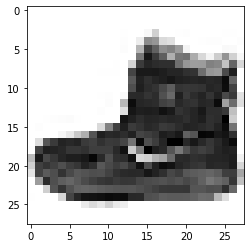

In [7]:
plt.imshow(X_train[0], cmap='Greys')

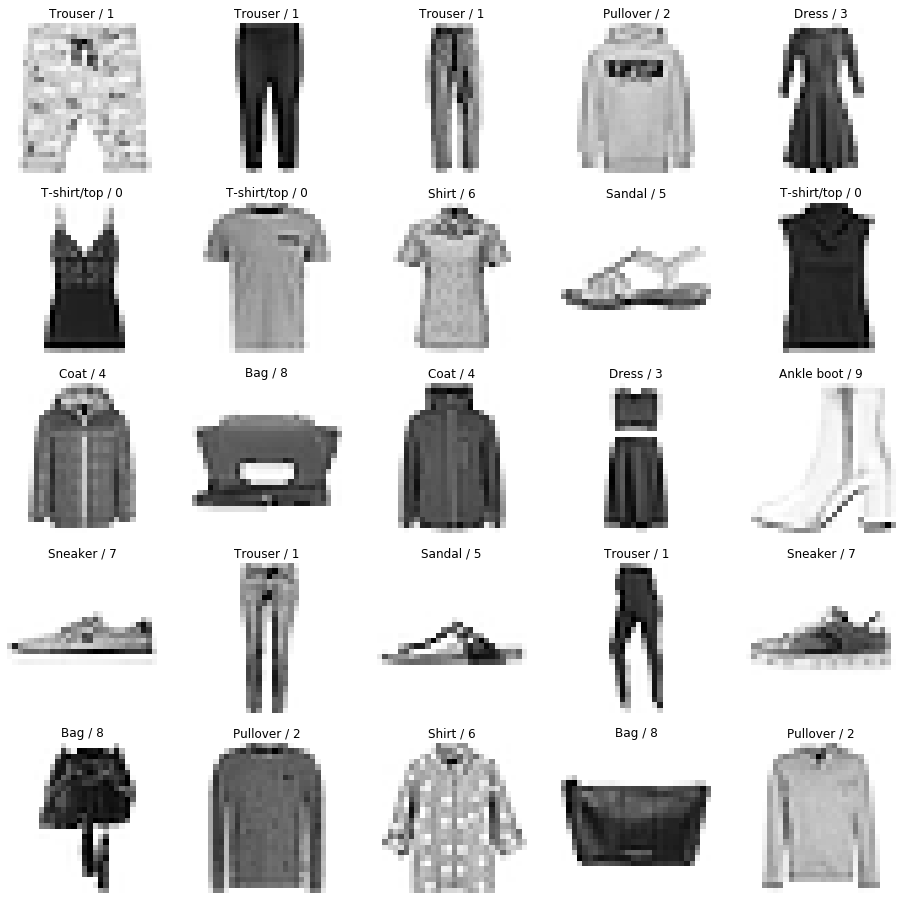

In [8]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0, 1000, 25):
  plt.subplot(5,5,j); j+=1
  plt.imshow(X_train[i], cmap="Greys")
  plt.axis('off') # off the axis
  plt.title('{} / {}'.format(class_labels[y_train[i]], y_train[i]))



## Change Dimention

In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
X_train.ndim

3

In [11]:
# expected conv2d_input to have 4 dimensions, but got array with shape (28, 28, 1)
# so we have increase the dimention 3 to 4
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

# ref: https://numpy.org/doc/stable/reference/generated/numpy.expand_dims.html

In [12]:
X_train.ndim

4

## Feature Scaling

In [13]:
X_train = X_train/255
X_test = X_test/255

## Split Dataset 

In [14]:
from sklearn.model_selection import train_test_split 
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size= 0.2, random_state=2020)

In [15]:
X_train.shape,  y_train.shape, X_validation.shape, y_validation.shape

((48000, 28, 28, 1), (48000,), (12000, 28, 28, 1), (12000,))

# Convolutional Neural Network - Model Building

In [16]:
#Building CNN model
cnn_model = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
])

In [17]:
cnn_model.summary() # get the summary of model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [18]:
# complie the model
cnn_model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
# train cnn model
cnn_model.fit(X_train, y_train, epochs=10, batch_size=512, verbose=1, validation_data=(X_validation, y_validation))

Epoch 1/10
94/94 [==============================] - 14s 152ms/step - loss: 0.6260 - accuracy: 0.7882 - val_loss: 0.4408 - val_accuracy: 0.8482
Epoch 2/10
94/94 [==============================] - 14s 153ms/step - loss: 0.3856 - accuracy: 0.8639 - val_loss: 0.3606 - val_accuracy: 0.8758
Epoch 3/10
94/94 [==============================] - 15s 154ms/step - loss: 0.3328 - accuracy: 0.8831 - val_loss: 0.3317 - val_accuracy: 0.8848
Epoch 4/10
94/94 [==============================] - 15s 156ms/step - loss: 0.3027 - accuracy: 0.8923 - val_loss: 0.3142 - val_accuracy: 0.8919
Epoch 5/10
94/94 [==============================] - 14s 150ms/step - loss: 0.2809 - accuracy: 0.9006 - val_loss: 0.3247 - val_accuracy: 0.8846
Epoch 6/10
94/94 [==============================] - 14s 154ms/step - loss: 0.2688 - accuracy: 0.9036 - val_loss: 0.2965 - val_accuracy: 0.8963
Epoch 7/10
94/94 [==============================] - 14s 148ms/step - loss: 0.2519 - accuracy: 0.9099 - val_loss: 0.2848 - val_accuracy: 0.8994

# Test the Model

In [20]:
y_pred = cnn_model.predict(X_test)
y_pred.round(2)

array([[0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.99, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.09, 0.03, 0.01]], dtype=float32)

In [21]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [22]:
cnn_model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.2745 - accuracy: 0.9021


[0.27446290850639343, 0.9021000266075134]

# Visualize output

In [23]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0, 1000,25):
  plt.subplot(5,5, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off') """

"plt.figure(figsize=(16,16))\n\nj=1\nfor i in np.random.randint(0, 1000,25):\n  plt.subplot(5,5, j); j+=1\n  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')\n  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))\n  plt.axis('off') "

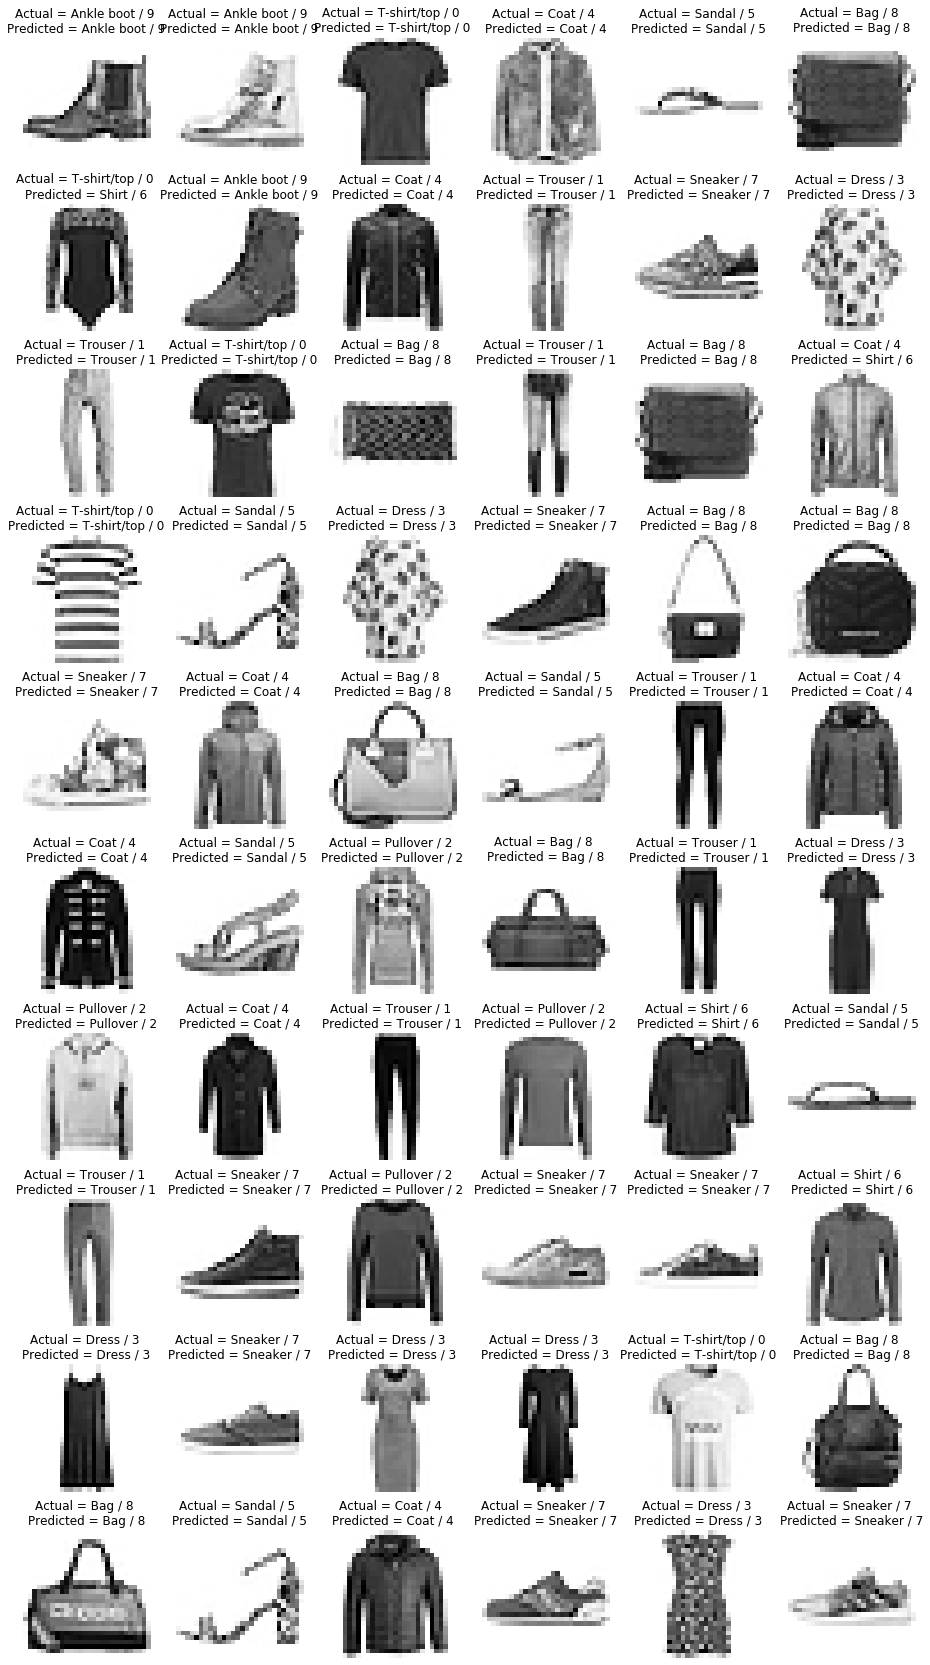

In [24]:
plt.figure(figsize=(16,30))

j=1
for i in np.random.randint(0, 1000,60):
  plt.subplot(10,6, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

## Confusion Matrix

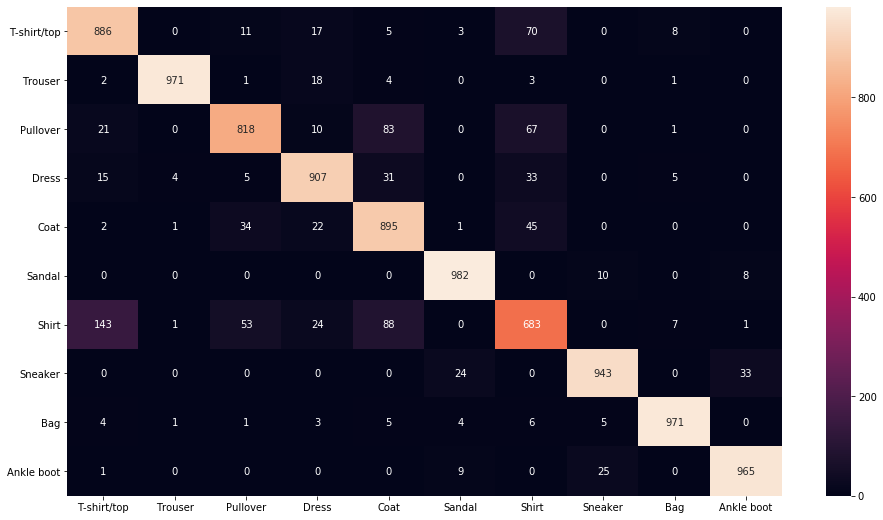

In [25]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)

# show cm 
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)

In [26]:
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.82      0.89      0.85      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.89      0.82      0.85      1000
       Dress       0.91      0.91      0.91      1000
        Coat       0.81      0.90      0.85      1000
      Sandal       0.96      0.98      0.97      1000
       Shirt       0.75      0.68      0.72      1000
     Sneaker       0.96      0.94      0.95      1000
         Bag       0.98      0.97      0.97      1000
  Ankle boot       0.96      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



# Save Model

In [27]:
cnn_model.save('fashion_mnist_cnn_model.h5') # Save model

In [28]:
# Load model
fashion_mnist_cnn_model = keras.models.load_model('fashion_mnist_cnn_model.h5')

In [29]:
Y_pred_sample = fashion_mnist_cnn_model.predict(np.expand_dims(X_test[0], axis=0)).round(2)
Y_pred_sample

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.98]],
      dtype=float32)

In [30]:
np.argmax(Y_pred_sample[0])

9

In [31]:
y_test[0]

9

# Convolutional Neural Network - Building Complex Model

In [32]:
#Building CNN model
cnn_model2 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
                         ])

In [33]:
# complie the model
cnn_model2.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [34]:
#Train the Model
cnn_model2.fit(X_train, y_train, epochs=20, batch_size=512, verbose=1, validation_data=(X_validation, y_validation))

Epoch 1/20
94/94 [==============================] - 18s 190ms/step - loss: 1.0349 - accuracy: 0.6149 - val_loss: 0.6062 - val_accuracy: 0.7634
Epoch 2/20
94/94 [==============================] - 17s 185ms/step - loss: 0.5735 - accuracy: 0.7843 - val_loss: 0.4801 - val_accuracy: 0.8229
Epoch 3/20
94/94 [==============================] - 17s 183ms/step - loss: 0.4833 - accuracy: 0.8207 - val_loss: 0.4283 - val_accuracy: 0.8412
Epoch 4/20
94/94 [==============================] - 18s 188ms/step - loss: 0.4255 - accuracy: 0.8445 - val_loss: 0.3850 - val_accuracy: 0.8562
Epoch 5/20
94/94 [==============================] - 17s 184ms/step - loss: 0.3865 - accuracy: 0.8600 - val_loss: 0.3520 - val_accuracy: 0.8696
Epoch 6/20
94/94 [==============================] - 17s 186ms/step - loss: 0.3537 - accuracy: 0.8716 - val_loss: 0.3360 - val_accuracy: 0.8757
Epoch 7/20
94/94 [==============================] - 18s 192ms/step - loss: 0.3331 - accuracy: 0.8781 - val_loss: 0.3309 - val_accuracy: 0.8775

In [35]:
cnn_model2.save('fashion_mnist_cnn_model2.h5')

In [36]:
#Building CNN model
cnn_model3 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.5),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),                        
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.10),                         
                         keras.layers.Dense(units=10, activation='softmax')
                         ])

In [37]:
# complie the model
cnn_model3.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [38]:
#Train the Model
cnn_model3.fit(X_train, y_train, epochs=50, batch_size=512, verbose=1, validation_data=(X_validation, y_validation))

Epoch 1/50
94/94 [==============================] - 36s 383ms/step - loss: 1.2257 - accuracy: 0.5188 - val_loss: 0.6290 - val_accuracy: 0.7555
Epoch 2/50
94/94 [==============================] - 36s 381ms/step - loss: 0.6100 - accuracy: 0.7686 - val_loss: 0.5021 - val_accuracy: 0.8086
Epoch 3/50
94/94 [==============================] - 36s 383ms/step - loss: 0.5019 - accuracy: 0.8121 - val_loss: 0.4538 - val_accuracy: 0.8213
Epoch 4/50
94/94 [==============================] - 35s 377ms/step - loss: 0.4337 - accuracy: 0.8420 - val_loss: 0.3737 - val_accuracy: 0.8659
Epoch 5/50
94/94 [==============================] - 35s 373ms/step - loss: 0.3832 - accuracy: 0.8645 - val_loss: 0.3609 - val_accuracy: 0.8698
Epoch 6/50
94/94 [==============================] - 36s 380ms/step - loss: 0.3450 - accuracy: 0.8763 - val_loss: 0.3212 - val_accuracy: 0.8826
Epoch 7/50
94/94 [==============================] - 35s 372ms/step - loss: 0.3127 - accuracy: 0.8885 - val_loss: 0.3287 - val_accuracy: 0.8827

In [39]:
cnn_model3.save('fashion_mnist_cnn_model3.h5')

In [40]:
cnn_model3.evaluate(X_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.4622 - accuracy: 0.9067


[0.4621957540512085, 0.9067000150680542]